In [0]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(228)

Необходимо оценивать параметр дисперсии для выборки из нормального распределения с известным мат ожиданием (0).
2 варианта:

1) Построить доверительный интервал вида: $$\Big(\sum X_k^2\,/\,\lambda_{(1+\gamma)/2}, \sum X_k^2\,/\,\lambda_{(1-\gamma)/2}\Big)$$
2) Или вида:
$$\Big(n\overline{X}^2\,/\,z^2_{(3+\gamma)/4}, n\overline{X}^2\,/\,z^2_{(3-\gamma)/4}\Big)$$

$\lambda_p$ --- квантиль распределения хи-квадрат с $n$ степенями свободы уровня $p$, 

$z_p$ --- квантиль нормального стандартного распределения уровня $p$

Изучим зависимость длины интервалов от размера выборки

In [0]:
def get_len(n, std, gamma):

    x = np.random.normal(loc=0, scale=std, size=n)
    smpl_size = np.array(range(1, n+1))
    sq_sum = np.cumsum(x**2)
    
    ll = sq_sum / scipy.stats.chi2.ppf((1 + gamma) / 2, smpl_size)
    rr = sq_sum / scipy.stats.chi2.ppf((1 - gamma) / 2, smpl_size)
    
    res = []
    res.append(np.abs(rr - ll))
    
    ssum = np.cumsum(x) ** 2 / smpl_size
    
    ll = ssum / (scipy.stats.norm.ppf((3 + gamma) / 4, loc=0, scale=1)**2)
    rr = ssum / (scipy.stats.norm.ppf((3 - gamma) / 4, loc=0, scale=1)**2)
    
    res.append(np.abs(rr - ll))
    
    return res

In [0]:
def test(n, experiments, std, gamma):
    res = [np.zeros(shape=(n, )), np.zeros(shape=(n, ))]
    
    for i in range(experiments):
        
        tmp = get_len(n, std, gamma)
        
        res[0] += tmp[0]
        res[1] += tmp[1]
        
    return res[0] / experiments, res[1] / experiments

In [0]:
def plot_test(std, gamma):
    max_size = 1000
    experiments = 1000

    res1, res2 = test(max_size, experiments, std, gamma)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    axes[0].title.set_text(f"Первый вариант с std = {std}, gamma = {gamma}")
    axes[0].scatter(np.arange(1, max_size + 1), res1)
    axes[1].title.set_text(f"Второй вариант с std = {std}, gamma = {gamma}")
    axes[1].scatter(np.arange(1, max_size + 1), res2)
    axes[-1].set_xlabel('.', color=(0, 0, 0, 0))
    axes[-1].set_ylabel('.', color=(0, 0, 0, 0))

    fig.text(0.5, 0.04, 'Размер выборки', va='center', ha='center')
    fig.text(0.01, 0.5, 'Размер доверительного интервала', va='center', ha='center', rotation='vertical')
    fig.tight_layout()


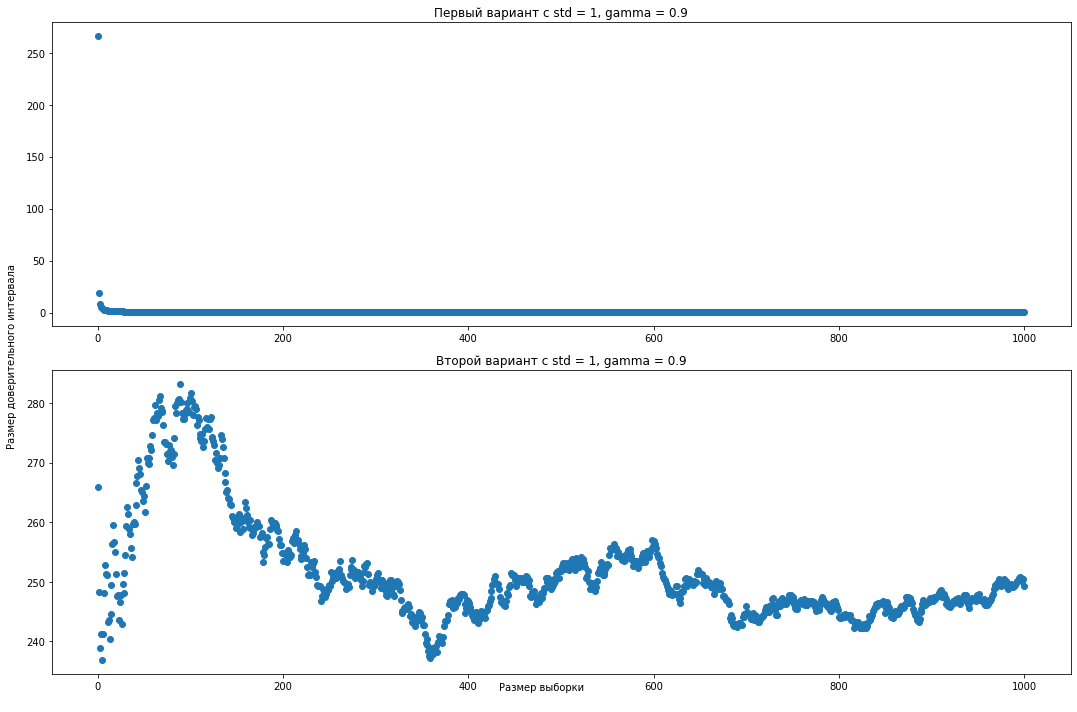

In [29]:
plot_test(1, 0.9)

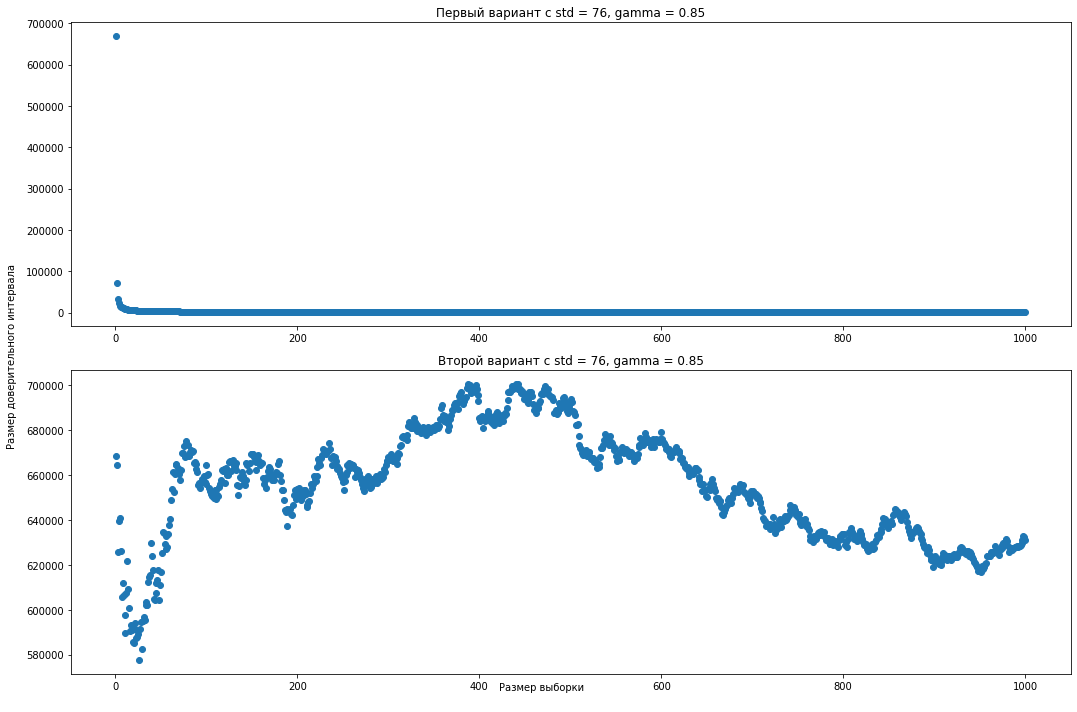

In [30]:
plot_test(76, 0.85)

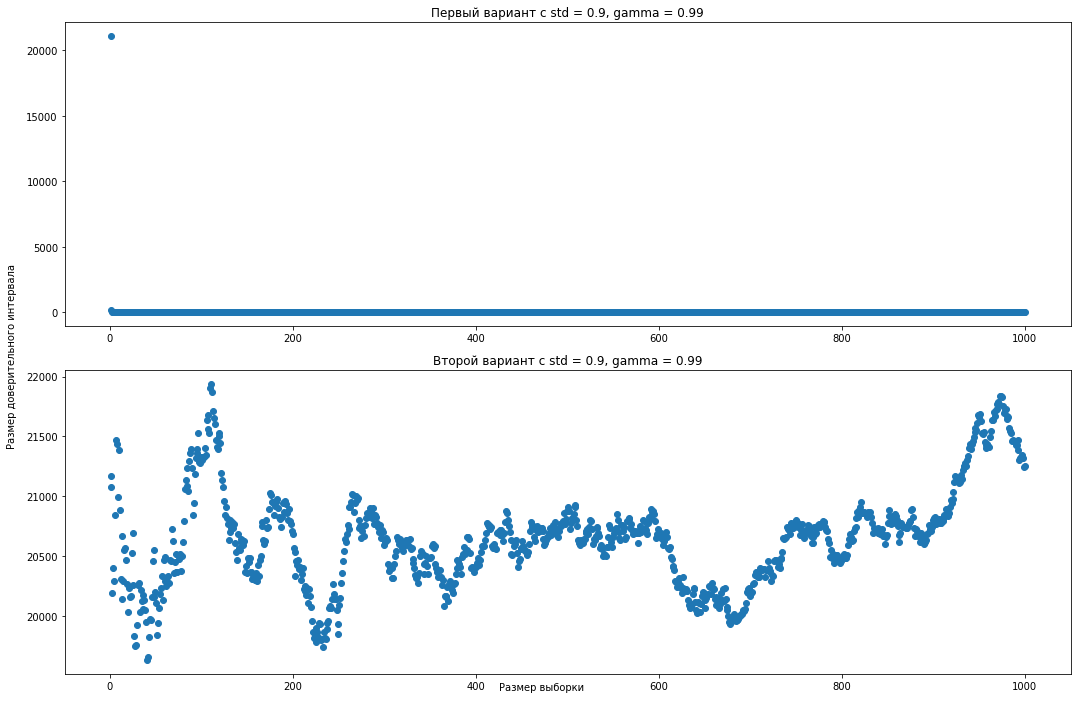

In [31]:
plot_test(0.9, 0.99)

Получается, что при различных коэффициентах первый вариант доверительного интервала сразу устремляется к нулю, что, собственно, отлично. При этом второй вариант работает странно, вроде при первых коэффициентах кажется, что он стемится к нулю, но это не так